In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from api import load_metadata, save_csv, load_url_from_resource, save_netcdf, save_json_from_URL
from plotting import timeseries_station
from data import load_dataset_from_csv
import xarray as xr

In [ ]:
url = load_url_from_resource("config/Datasets.json", resource="klima-v2-10min")

In [41]:
url = load_url_from_resource("config/Datasets.json", resource="/grid/forecast/nwp-v1-1h-2500m")
url

URL('https://dataset.api.hub.geosphere.at/v1/grid/forecast/nwp-v1-1h-2500m')

In [ ]:
save_json_from_URL(url / "metadata", filename="config/Metadata_nwp-v1-1h-2500m.json")

In [ ]:
save_netcdf(
    url,
    filename="../../nwp.nc",
    params=dict(
        # start="2025-01-03T00:00",
        # end="2026-01-04T12:00",
        parameters=["t2m", "tcc", "rr_acc", "snow_acc"],
        bbox="45.0,8.0,50.0,18.0",
        # station_ids=15920,
        output_format="netcdf",
    ),
)

In [ ]:
da = xr.load_dataset("../../nwp.nc")
ds = da["snow_acc"].sum("time")  # .isel(time=-1)
# ts = pd.to_datetime(ds.time.item(), utc=True)
ts = "2025-01-01"
ts


'2025-01-01'

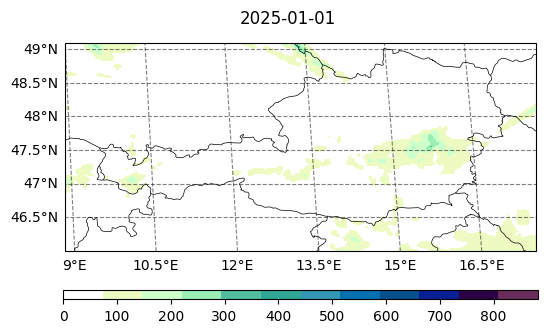

In [128]:
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
from cartopy.feature import BORDERS
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import colormaps as cmaps

fig, axs = plt.subplot_mosaic(
    "a", figsize=(10, 10 / 3), per_subplot_kw={"a": dict(projection=ccrs.Robinson(central_longitude=0))}
)
ax = axs["a"]


ax.coastlines(zorder=3, linewidth=0.5, edgecolor="black")
ax.add_feature(BORDERS, linewidth=0.5, edgecolor="black")
# ax.add_feature(Nightshade(ts, alpha=0.2))
im = ax.pcolormesh(
    ds.lon,
    ds.lat,
    ds,
    transform=ccrs.PlateCarree(),
    #   levels=levels,
    cmap=cmaps.precip_11lev,
)
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5, color="black")
gl.right_labels = False
gl.top_labels = False

cb = plt.colorbar(mappable=im, ax=ax, location="bottom", orientation="horizontal", fraction=0.037, pad=0.15, aspect=50)
# ax.colorbar(im, fraction=0.046, pad=0.04)
fig.suptitle(ts)
ax.set_extent([9.0, 17.5, 46.0, 49.1])

In [ ]:
save_csv(
    url,
    filename="../../murau_data.csv",
    params=dict(
        start="2025-12-30",
        end="2026-01-10",
        parameters=["TL", "RR"],
        station_ids=15920,
        output_format="csv",
    ),
)

In [ ]:
df = load_dataset_from_csv(filename="../../murau_data.csv", configfile="config/Metadata_klima-v2-10min.json")

In [ ]:
df["tl"].head()

In [ ]:
fig, axs = timeseries_station(
    df, y="tl", filename=None, add_daynight=False, y_lim=None, title="Timeseries Murau Temperature"
)
axs["a"].set_ylabel(df["tl"].attrs["label"])

In [ ]:
df.head()